In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter("ignore")


In [3]:
df=pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN20465,2,0,0,1,Meal Plan 1,0,Room_Type 1,57,2018,10,28,Online,0,0,0,116.1,2,Not_Canceled
1,INN02984,1,0,0,2,Meal Plan 1,0,Room_Type 1,14,2017,10,15,Offline,0,0,0,100.0,0,Not_Canceled
2,INN06624,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.0,0,Canceled
3,INN19034,2,1,1,1,Meal Plan 1,0,Room_Type 1,101,2018,8,20,Online,0,0,0,134.1,1,Not_Canceled
4,INN25547,2,0,2,1,Meal Plan 1,0,Room_Type 1,221,2017,10,17,Offline,0,0,0,65.0,0,Not_Canceled


In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Booking_ID'], inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,1,Meal Plan 1,0,Room_Type 1,57,2018,10,28,Online,0,0,0,116.1,2,Not_Canceled
1,1,0,0,2,Meal Plan 1,0,Room_Type 1,14,2017,10,15,Offline,0,0,0,100.0,0,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.0,0,Canceled
3,2,1,1,1,Meal Plan 1,0,Room_Type 1,101,2018,8,20,Online,0,0,0,134.1,1,Not_Canceled
4,2,0,2,1,Meal Plan 1,0,Room_Type 1,221,2017,10,17,Offline,0,0,0,65.0,0,Not_Canceled


In [7]:
df.shape

(29020, 18)

In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(7668)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(21352, 18)

In [12]:
df["no_of_adults"].value_counts()

no_of_adults
2    15481
1     4004
3     1741
0      114
4       12
Name: count, dtype: int64

In [13]:
df["no_of_children"].value_counts()

no_of_children
0    19264
1     1224
2      848
3       14
9        2
Name: count, dtype: int64

In [14]:
df["no_of_week_nights"].value_counts()

no_of_week_nights
2     5946
1     5777
3     4604
4     1960
0     1500
5     1171
6      150
7       90
8       45
10      42
9       22
11      16
15       9
12       8
14       7
13       3
17       1
16       1
Name: count, dtype: int64

In [15]:
df["type_of_meal_plan"].value_counts()

type_of_meal_plan
Meal Plan 1     16770
Not Selected     3612
Meal Plan 2       965
Meal Plan 3         5
Name: count, dtype: int64

In [16]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15203
Canceled         6149
Name: count, dtype: int64

#### Data is imbalance 

In [17]:
cat_cols = ['type_of_meal_plan' , 'required_car_parking_space' , 'room_type_reserved',
            'market_segment_type' ,'repeated_guest', 'booking_status' ]
num_cols = ['no_of_adults' , 'no_of_children' , 'no_of_week_nights' , 'no_of_weekend_nights' ,
            'lead_time' , 'avg_price_per_room' , 'no_of_special_requests','arrival_month', 'no_of_previous_cancellations','arrival_year','no_of_previous_bookings_not_canceled'
            ,'arrival_date']

In [18]:
len(cat_cols), len(num_cols)

(6, 12)

## Data Analysis

In [19]:
data = df.copy()

In [20]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,1,Meal Plan 1,0,Room_Type 1,57,2018,10,28,Online,0,0,0,116.1,2,Not_Canceled
1,1,0,0,2,Meal Plan 1,0,Room_Type 1,14,2017,10,15,Offline,0,0,0,100.0,0,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.0,0,Canceled
3,2,1,1,1,Meal Plan 1,0,Room_Type 1,101,2018,8,20,Online,0,0,0,134.1,1,Not_Canceled
4,2,0,2,1,Meal Plan 1,0,Room_Type 1,221,2017,10,17,Offline,0,0,0,65.0,0,Not_Canceled


## Univariate Analysis

In [21]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(16, len(num_features)*5))

    axes = np.atleast_2d(axes)   # ensures consistent indexing

    for i, column in enumerate(num_features):
        sns.histplot(
            data=df,
            x=column,
            ax=axes[i][0],
            kde=True,
            color="blue"
        )
        axes[i][0].set_title(f"Histogram of {column}")

        sns.boxplot(
            data=df,
            x=column,
            ax=axes[i][1],
            palette="Blues"
        )
        axes[i][1].set_title(f"Boxplot for {column}")

    plt.tight_layout()
    plt.show()


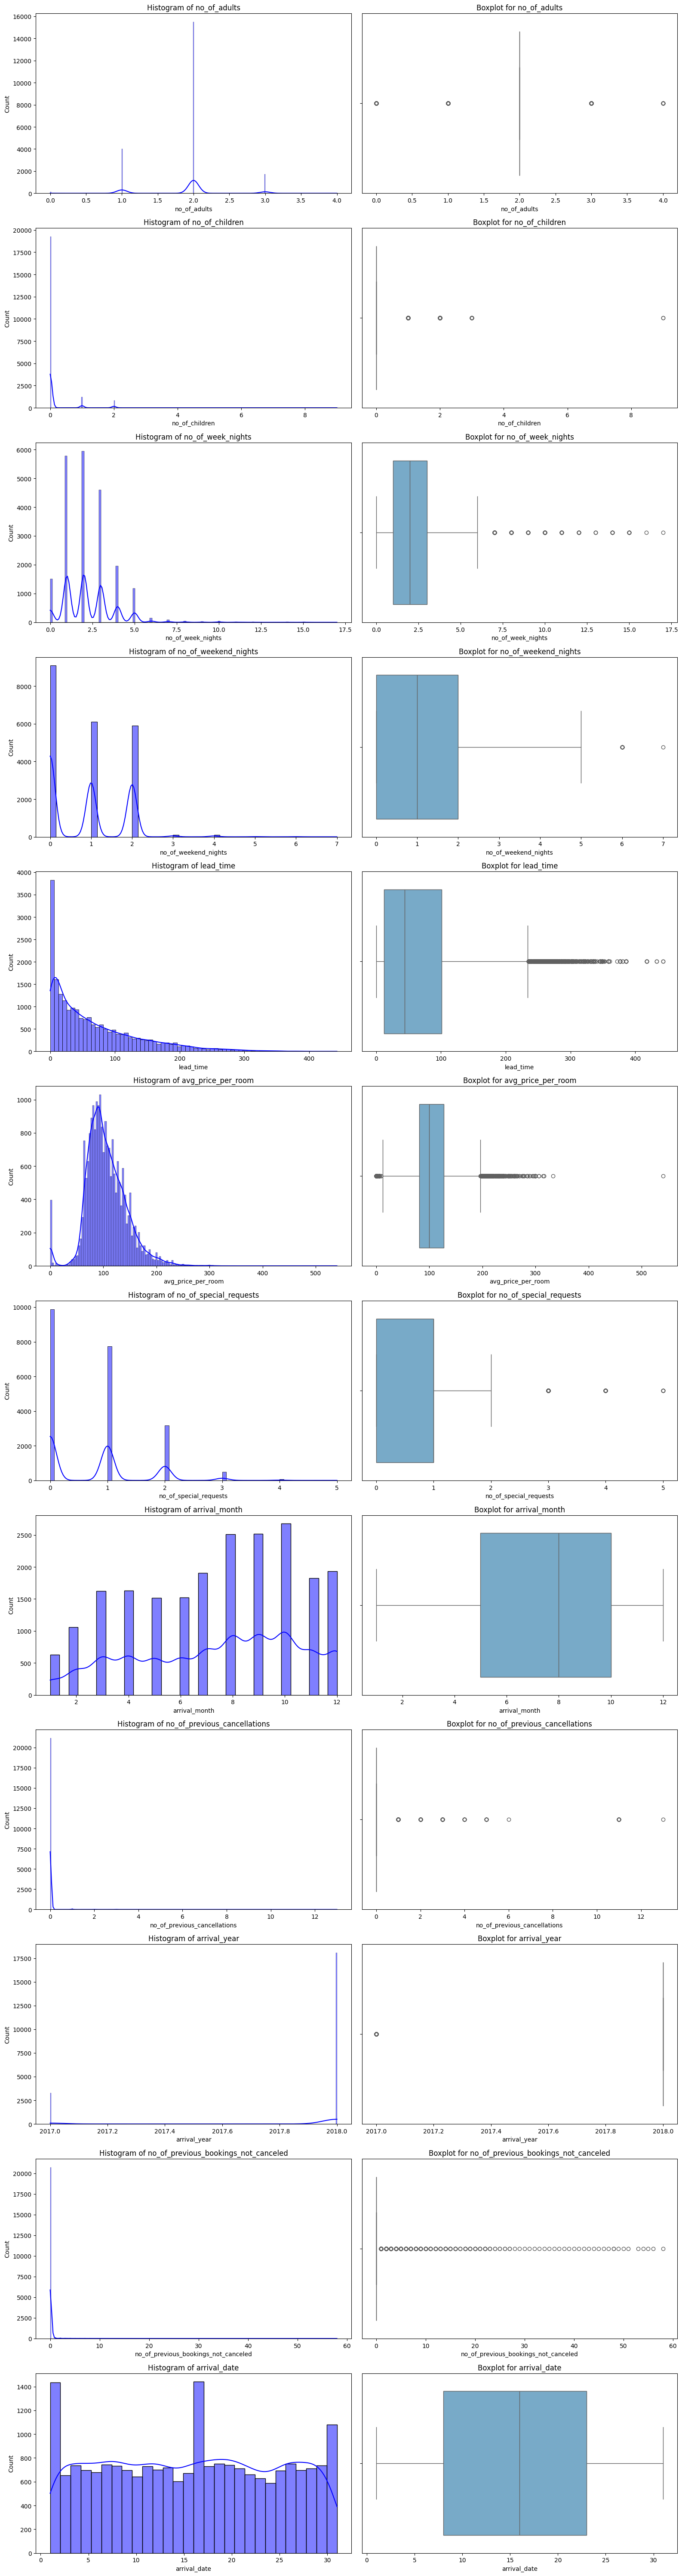

In [22]:
num_plot_dist(data, num_cols)

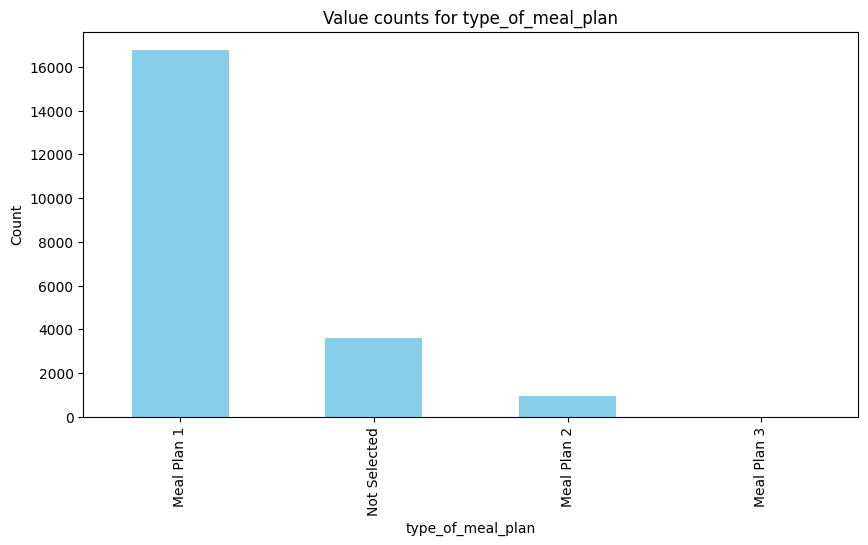

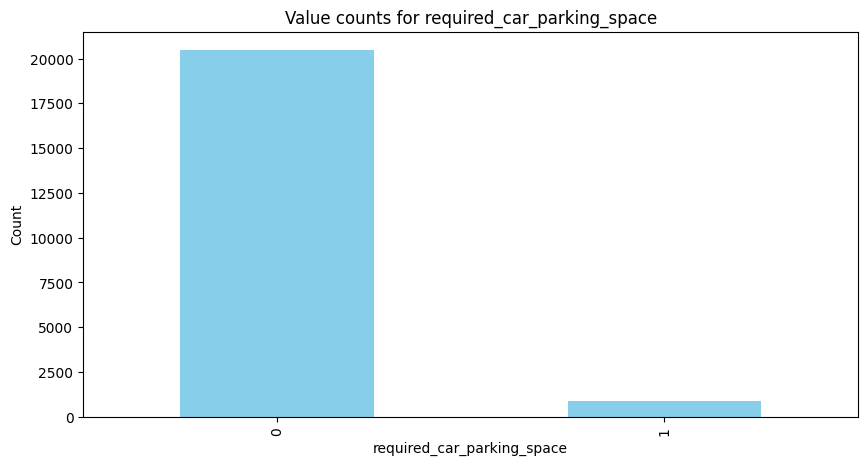

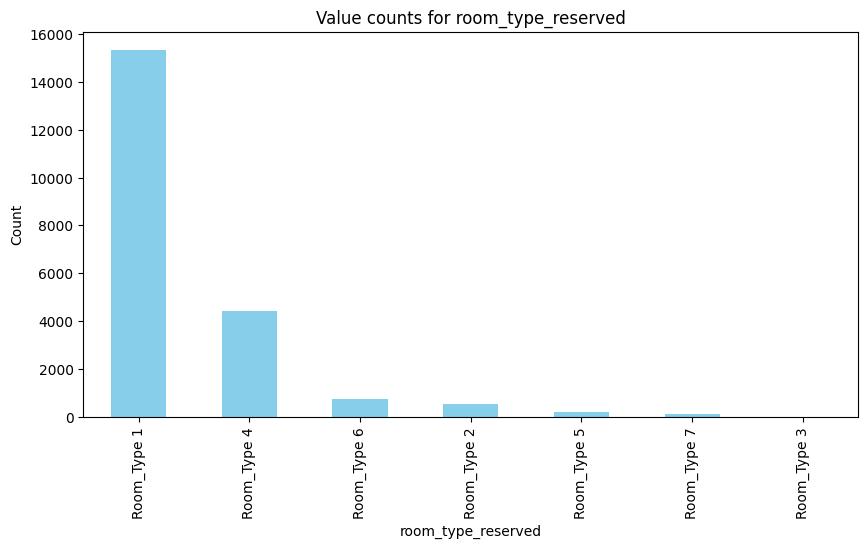

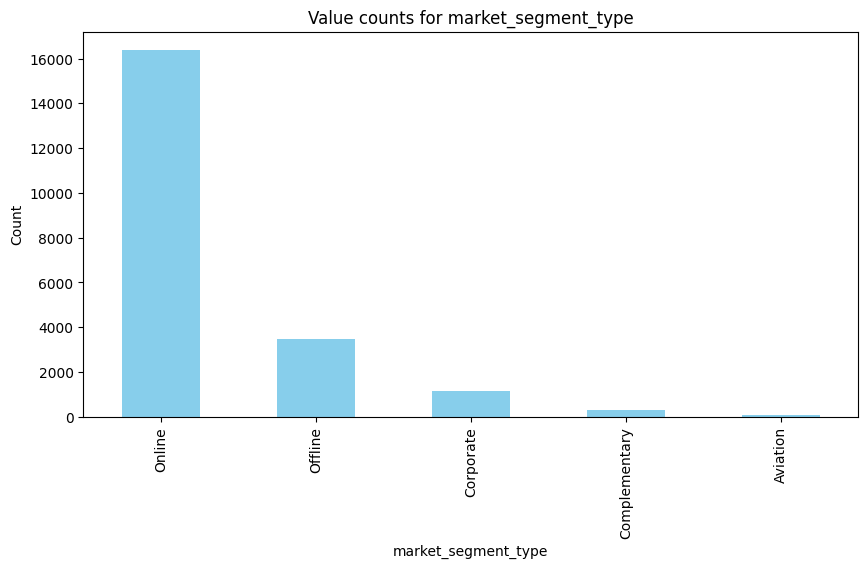

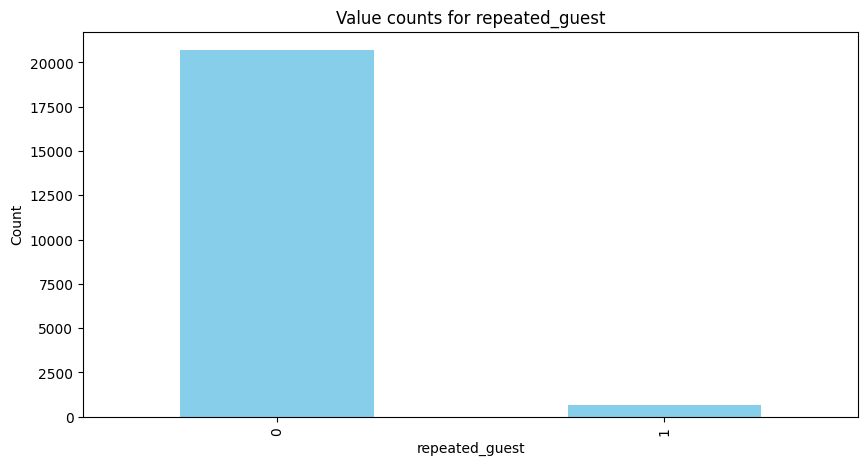

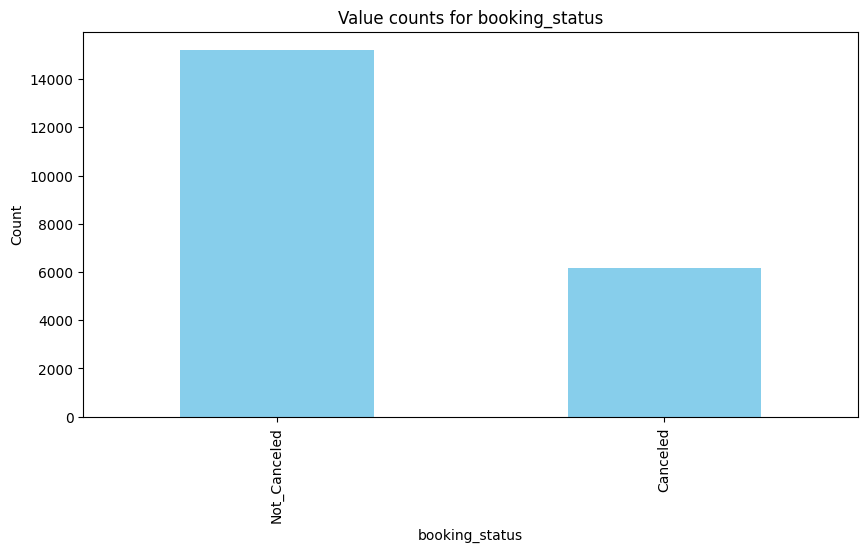

In [23]:
for cat_features in cat_cols:
    plt.figure(figsize=(10,5))
    data[cat_features].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f"Value counts for {cat_features}")
    plt.xlabel(cat_features)
    plt.ylabel("Count")
    plt.show()

### Bivariate Analysis


In [24]:
def plot_bivariate_num(df, target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes =plt.subplots(num_rows , 2 , figsize=(15, num_rows*5))
    axes=axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column,ax=axes[i], data=df, palette="Set2")
        axes[i].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()

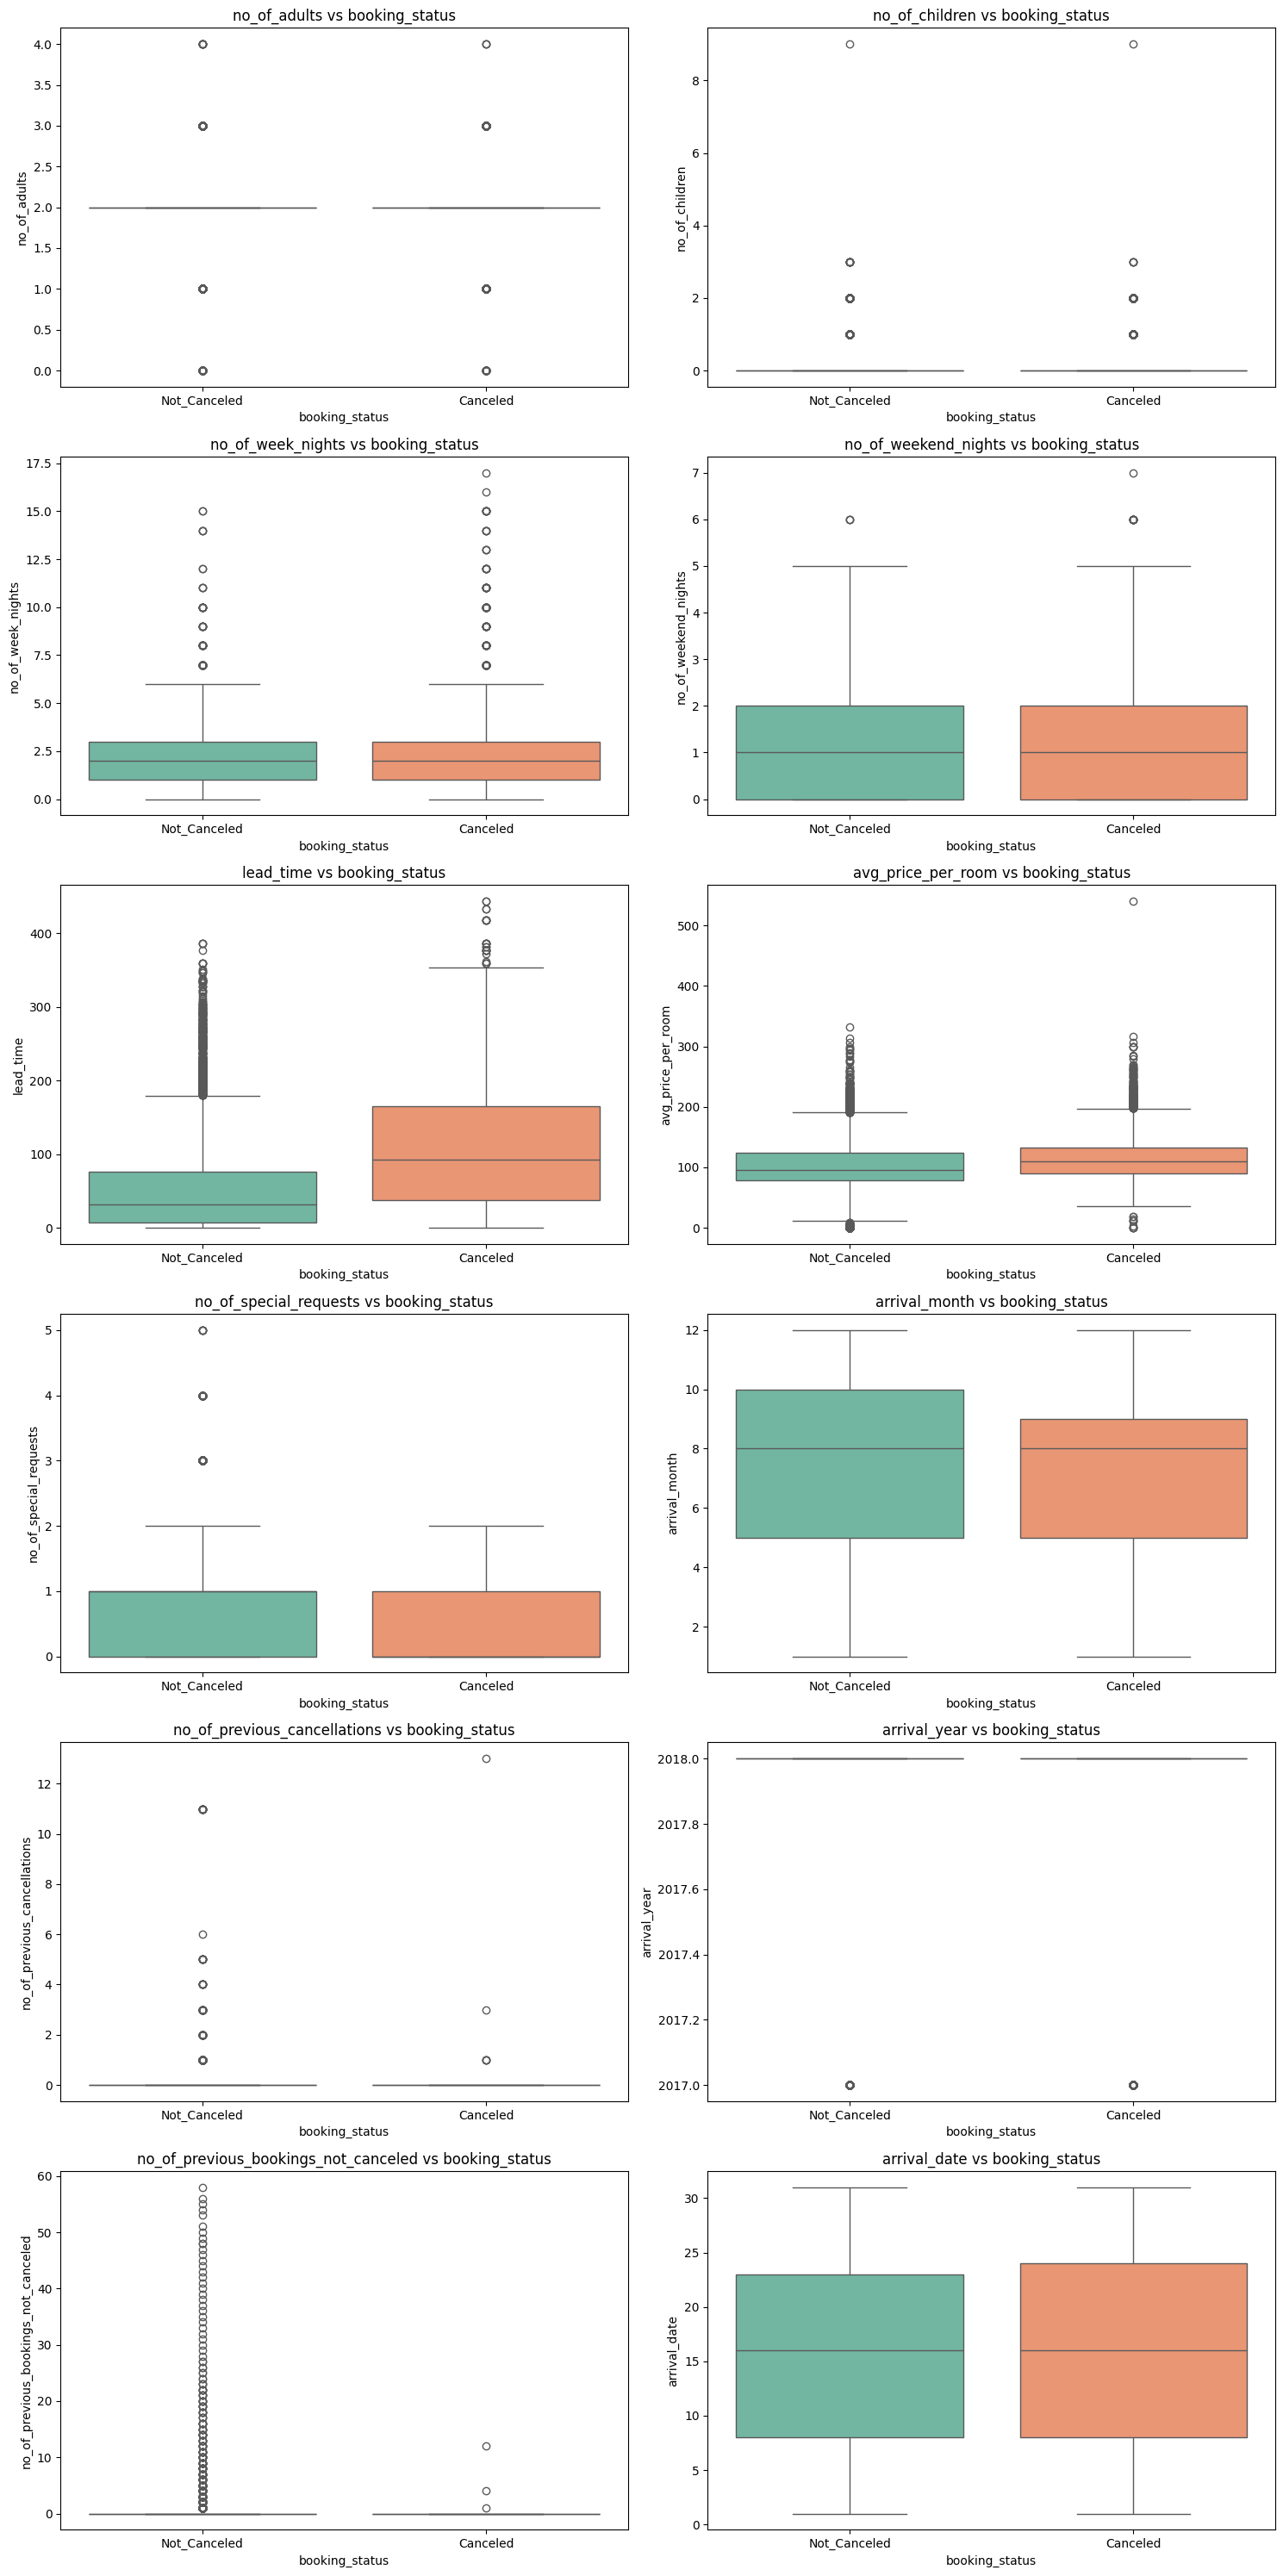

In [25]:
plot_bivariate_num(data, 'booking_status' , num_cols)

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

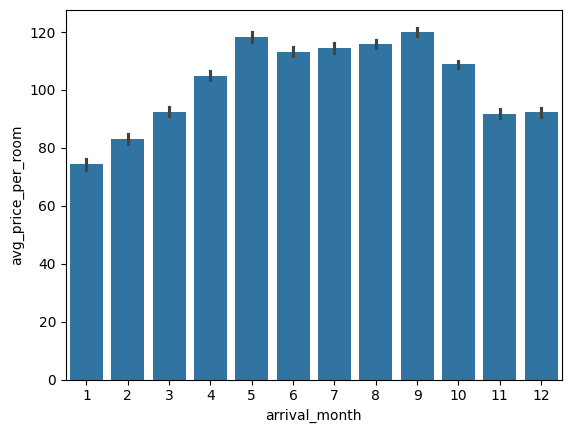

In [26]:
sns.barplot(x='arrival_month', y='avg_price_per_room',  data=data)

In [27]:
def plot_bivariate_cat(df, target , cat_features):
    num_features=len(cat_features)
    num_rows=(num_features+1)//2

    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    axes=axes.flatten()

    for i,features in enumerate(cat_features):
        sns.countplot(x=features, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{features} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()



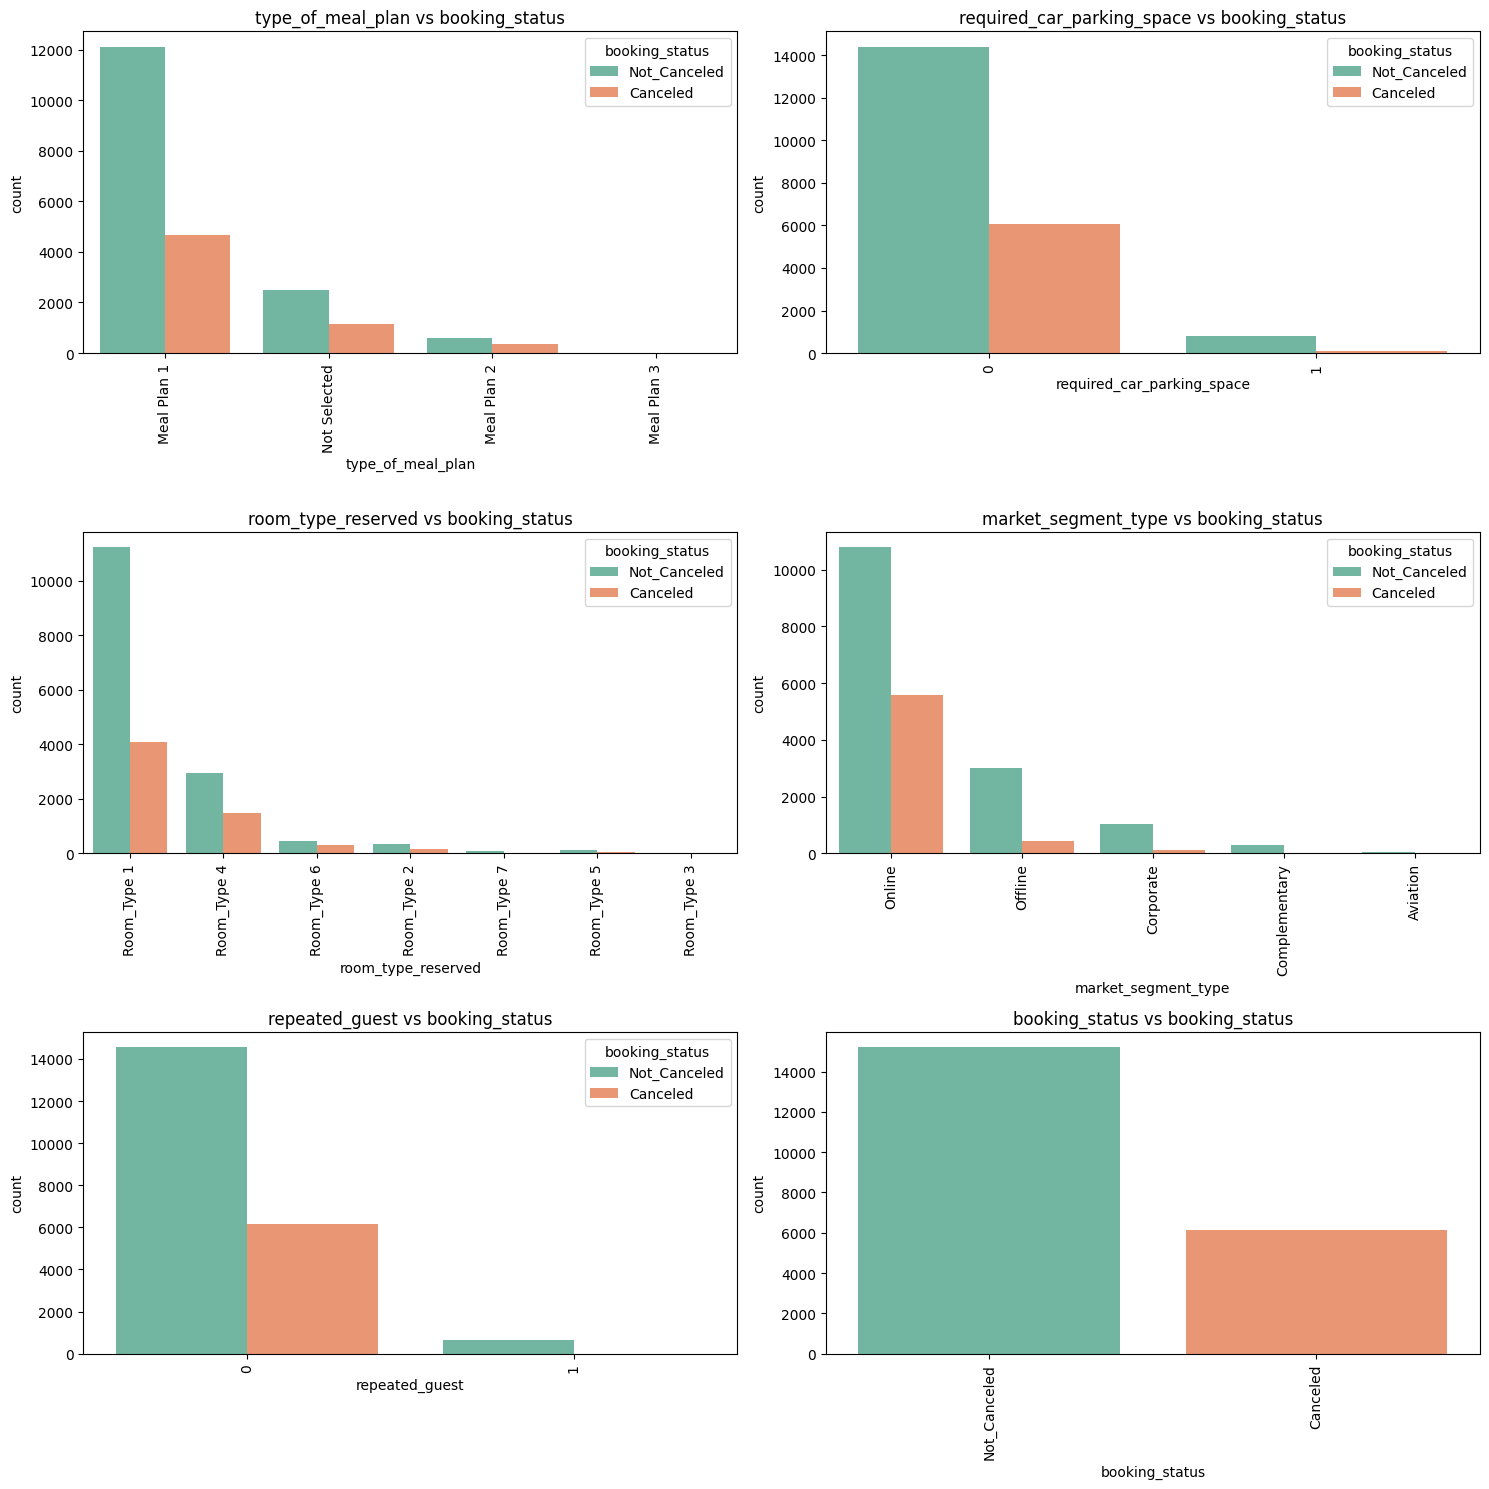

In [28]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

#### Data Processing

In [29]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,1,Meal Plan 1,0,Room_Type 1,57,2018,10,28,Online,0,0,0,116.1,2,Not_Canceled
1,1,0,0,2,Meal Plan 1,0,Room_Type 1,14,2017,10,15,Offline,0,0,0,100.0,0,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.0,0,Canceled
3,2,1,1,1,Meal Plan 1,0,Room_Type 1,101,2018,8,20,Online,0,0,0,134.1,1,Not_Canceled
4,2,0,2,1,Meal Plan 1,0,Room_Type 1,221,2017,10,17,Offline,0,0,0,65.0,0,Not_Canceled


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21352 entries, 0 to 29017
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21352 non-null  int64  
 1   no_of_children                        21352 non-null  int64  
 2   no_of_weekend_nights                  21352 non-null  int64  
 3   no_of_week_nights                     21352 non-null  int64  
 4   type_of_meal_plan                     21352 non-null  object 
 5   required_car_parking_space            21352 non-null  int64  
 6   room_type_reserved                    21352 non-null  object 
 7   lead_time                             21352 non-null  int64  
 8   arrival_year                          21352 non-null  int64  
 9   arrival_month                         21352 non-null  int64  
 10  arrival_date                          21352 non-null  int64  
 11  market_segment_type 

In [31]:
### Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder


In [32]:
label_encoder = LabelEncoder()
mappings={}

for col in cat_cols:
    df[col]=label_encoder.fit_transform(df[col])

    mappings[col]={label: code for label,code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
    

In [33]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [34]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,1,0,0,0,57,2018,10,28,4,0,0,0,116.1,2,1
1,1,0,0,2,0,0,0,14,2017,10,15,3,0,0,0,100.0,0,1
2,2,0,0,3,0,0,0,213,2018,6,7,4,0,0,0,130.0,0,0
3,2,1,1,1,0,0,0,101,2018,8,20,4,0,0,0,134.1,1,1
4,2,0,2,1,0,0,0,221,2017,10,17,3,0,0,0,65.0,0,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21352 entries, 0 to 29017
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21352 non-null  int64  
 1   no_of_children                        21352 non-null  int64  
 2   no_of_weekend_nights                  21352 non-null  int64  
 3   no_of_week_nights                     21352 non-null  int64  
 4   type_of_meal_plan                     21352 non-null  int64  
 5   required_car_parking_space            21352 non-null  int64  
 6   room_type_reserved                    21352 non-null  int64  
 7   lead_time                             21352 non-null  int64  
 8   arrival_year                          21352 non-null  int64  
 9   arrival_month                         21352 non-null  int64  
 10  arrival_date                          21352 non-null  int64  
 11  market_segment_type 

In [36]:
### Checking for multicollinearity
!pip install statsmodels

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [38]:
X= add_constant(df)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [39]:
vif_data

,feature,VIF
0,const,4.052556e+07
1,no_of_adults,1.327883e+00
2,no_of_children,1.288918e+00
3,no_of_weekend_nights,1.077691e+00
4,no_of_week_nights,1.131070e+00
5,type_of_meal_plan,1.173211e+00
6,required_car_parking_space,1.033339e+00
7,room_type_reserved,1.553415e+00
8,lead_time,1.403816e+00
9,arrival_year,1.293041e+00


### Data doesn't have MultiCollinearity

In [40]:
corr =  df.corr()

In [41]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049422,0.088833,0.108256,-0.006574,0.000644,0.270234,0.151776,0.093025,0.010826,0.023265,0.304750,-0.229878,-0.062722,-0.142985,0.320971,0.158183,-0.093632
no_of_children,-0.049422,1.000000,0.006650,0.014158,-0.103947,0.022359,0.361605,0.013524,0.033826,0.006532,0.023190,0.100530,-0.047638,-0.020640,-0.028788,0.352685,0.098708,-0.063800
no_of_weekend_nights,0.088833,0.006650,1.000000,0.234024,-0.034527,-0.052205,0.024687,0.132302,0.029639,0.013740,0.006586,0.094441,-0.088265,-0.027797,-0.038013,-0.006711,0.017679,-0.071598
no_of_week_nights,0.108256,0.014158,0.234024,1.000000,-0.075239,-0.060950,0.081179,0.221001,0.008844,0.034168,-0.003465,0.116205,-0.116908,-0.034108,-0.053820,0.009388,0.028984,-0.125981
type_of_meal_plan,-0.006574,-0.103947,-0.034527,-0.075239,1.000000,-0.020291,-0.246239,-0.051534,0.096750,0.006000,0.000880,0.179873,-0.071138,-0.018879,-0.045288,-0.101992,-0.008838,-0.034115
required_car_parking_space,0.000644,0.022359,-0.052205,-0.060950,-0.020291,1.000000,0.019926,-0.043883,0.006381,-0.007507,-0.008751,-0.038323,0.106777,0.024954,0.052279,0.061825,0.070990,0.087947
room_type_reserved,0.270234,0.361605,0.024687,0.081179,-0.246239,0.019926,1.000000,-0.011940,0.086566,0.001627,0.026662,0.091726,-0.041318,-0.009533,-0.023098,0.489291,0.086521,-0.072900
lead_time,0.151776,0.013524,0.132302,0.221001,-0.051534,-0.043883,-0.011940,1.000000,0.172687,0.130941,0.037233,0.135060,-0.146090,-0.052361,-0.085255,-0.043424,-0.014560,-0.370580
arrival_year,0.093025,0.033826,0.029639,0.008844,0.096750,0.006381,0.086566,0.172687,1.000000,-0.324221,0.016640,0.107713,-0.005632,0.010694,0.026395,0.173582,-0.002234,-0.153433
arrival_month,0.010826,0.006532,0.013740,0.034168,0.006000,-0.007507,0.001627,0.130941,-0.324221,1.000000,-0.017936,-0.014555,-0.004120,-0.038497,-0.005913,0.067649,0.136314,0.015210


<Axes: >

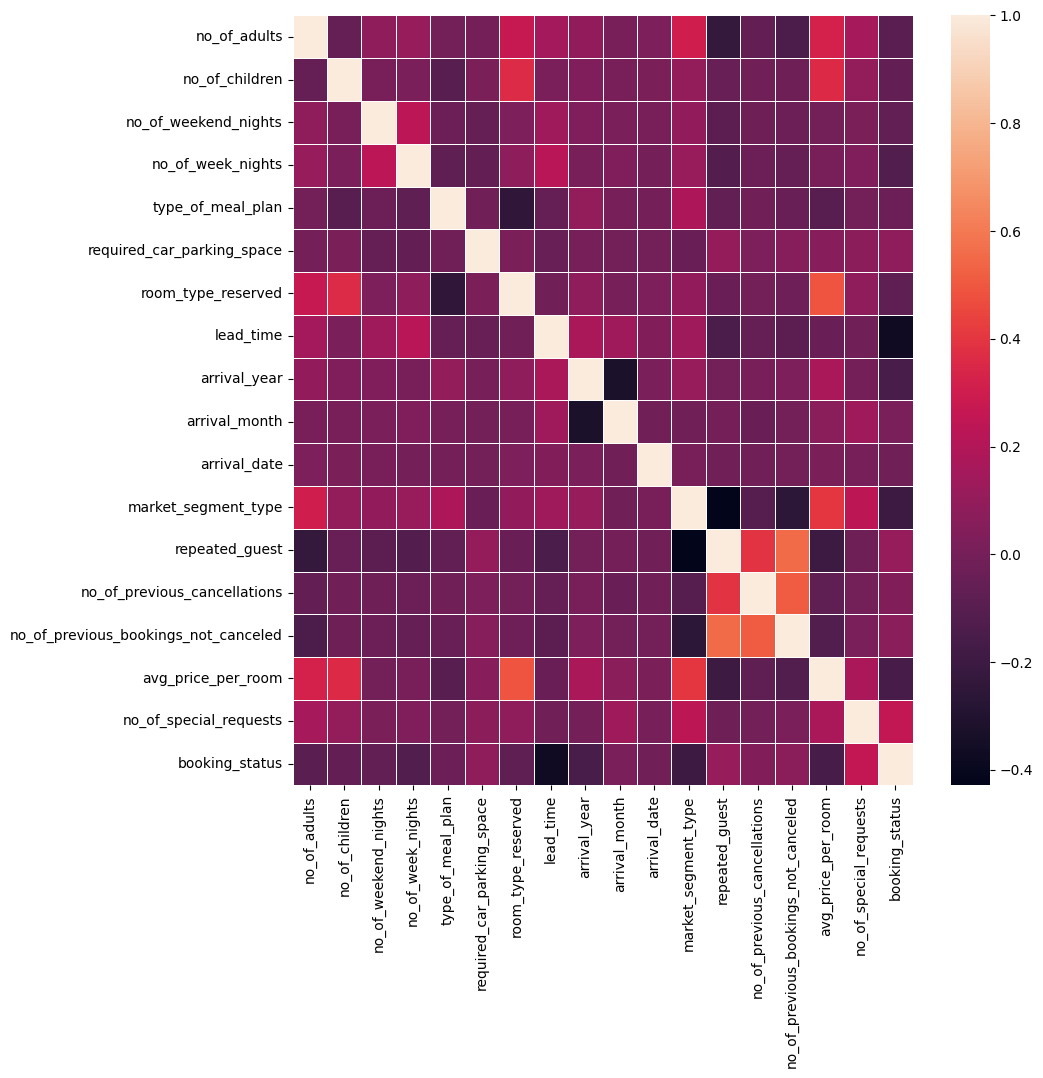

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.5)

### checking for Skewness

In [43]:
skeness=df.skew()

In [44]:
skeness

no_of_adults                            -0.310572
no_of_children                           3.842889
no_of_weekend_nights                     0.664684
no_of_week_nights                        1.587252
type_of_meal_plan                        1.656443
required_car_parking_space               4.622206
room_type_reserved                       1.383479
lead_time                                1.409001
arrival_year                            -1.922898
arrival_month                           -0.302918
arrival_date                             0.012572
market_segment_type                     -2.355488
repeated_guest                           5.443738
no_of_previous_cancellations            22.750539
no_of_previous_bookings_not_canceled    16.803658
avg_price_per_room                       0.580148
no_of_special_requests                   0.913134
booking_status                          -0.936492
dtype: float64

In [45]:
for col in df.columns:
    if skeness[col]>5:
        df[col]=np.log1p(df[col])

### Handling Imbalance Data

In [46]:
df['booking_status'].value_counts()

booking_status
1    15203
0     6149
Name: count, dtype: int64

In [60]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [61]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [62]:
!pip install imbalanced-learn

In [63]:
y.value_counts()

booking_status
1    15203
0     6149
Name: count, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X, y)

In [66]:
y_res

0        1
1        1
2        0
3        1
4        1
        ..
30401    0
30402    0
30403    0
30404    0
30405    0
Name: booking_status, Length: 30406, dtype: int64

In [67]:
X_res

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,1,0,0,0,57,2018,10,28,4,0.0,0.0,0.0,116.100000,2
1,1,0,0,2,0,0,0,14,2017,10,15,3,0.0,0.0,0.0,100.000000,0
2,2,0,0,3,0,0,0,213,2018,6,7,4,0.0,0.0,0.0,130.000000,0
3,2,1,1,1,0,0,0,101,2018,8,20,4,0.0,0.0,0.0,134.100000,1
4,2,0,2,1,0,0,0,221,2017,10,17,3,0.0,0.0,0.0,65.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30401,2,0,1,2,0,0,2,92,2018,9,6,4,0.0,0.0,0.0,149.318179,0
30402,2,0,0,2,0,0,0,36,2018,10,25,4,0.0,0.0,0.0,94.231569,0
30403,1,0,0,2,0,0,3,234,2018,9,16,2,0.0,0.0,0.0,106.025003,0
30404,2,0,0,1,3,0,0,38,2018,2,11,4,0.0,0.0,0.0,70.612349,0


In [68]:
y_res.value_counts()

booking_status
1    15203
0    15203
Name: count, dtype: int64

In [69]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,1,0,0,0,57,2018,10,28,4,0.0,0.0,0.0,116.1,2,1
1,1,0,0,2,0,0,0,14,2017,10,15,3,0.0,0.0,0.0,100.0,0,1
2,2,0,0,3,0,0,0,213,2018,6,7,4,0.0,0.0,0.0,130.0,0,0
3,2,1,1,1,0,0,0,101,2018,8,20,4,0.0,0.0,0.0,134.1,1,1
4,2,0,2,1,0,0,0,221,2017,10,17,3,0.0,0.0,0.0,65.0,0,1


In [70]:
df.shape

(21352, 18)

In [71]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [72]:
balanced_df.shape

(30406, 18)

In [73]:
df = balanced_df.copy()

In [74]:
df.shape

(30406, 18)

### Feature Selection

In [75]:
len(df.columns)

18

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [79]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [80]:
feature_importance = model.feature_importances_

In [81]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [84]:
top_features_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [86]:
len(df.columns)

18

In [87]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [88]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,57,2,116.1,10,28,4,1,0,0,0,1
1,14,0,100.0,10,15,3,2,0,0,0,1
2,213,0,130.0,6,7,4,3,0,0,0,0
3,101,1,134.1,8,20,4,1,1,0,0,1
4,221,0,65.0,10,17,3,1,2,0,0,1


In [89]:
len(top_10_df.columns)

11

In [90]:
df = top_10_df.copy()

### Model Selection

In [91]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 5.6 MB/s eta 0:00:13
   - -------------------------------------- 2.1/72.0 MB 5.9 MB/s eta 0:00:12
   - -------------------------------------- 2.1/72.0 MB 5.9 MB/s eta 0:00:12
   - -------------------------------------- 3.4/72.0 MB 4.3 MB/s eta 0:00:17
   -- ------------------------------------- 4.2/72.0 MB 4.6 MB/s eta 0:00:15
   -- ------------------------------------- 4.7/72.0 MB 4.0 MB/s eta 0:00:17
   --- ------------------------------------ 5.5/72.0 MB 4.0 MB/s eta 0:00:17
   --- ------------------------------------ 6.8/72.0 MB 4.3 MB/s eta 0:00:16
   ---- ----------------------------------- 8.1/72.0 MB 4.5 MB/s eta 0:00:15
   ----- ---------------------------------- 9.2/72.0 MB 4.8 MB/s eta 0:00:14
   ----- ---------------------------------- 9.7/72.0 MB 4.4 MB/s eta 0:00:15
   ------ --------------------------------- 11.3/72.0 MB 4.7 MB/s eta 0:00:14
   --

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [95]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [96]:
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [104]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "Gradent Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Nave Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}


In [105]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Recall" : [],
    "Precision": [],
    "F1 Score":[]
}

In [106]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision =precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


In [107]:
metrics_df = pd.DataFrame(metrics)

In [108]:
metrics_df

,Model,Accuracy,Recall,Precision,F1 Score
0,Random Forest,0.890168,0.888852,0.890615,0.889733
1,LogisticRegression,0.767182,0.729881,0.787544,0.757617
2,Gradent Boosting,0.835745,0.853232,0.823623,0.838166
3,AdaBoost,0.792174,0.782322,0.797043,0.789614
4,Decision Tree,0.841993,0.831794,0.848301,0.839967
5,Support Vector Machine,0.726241,0.716689,0.729439,0.723008
6,KNN,0.777047,0.681069,0.841483,0.752825
7,Nave Bayes,0.767346,0.722296,0.792617,0.755824
8,XGBoost,0.866327,0.869723,0.863175,0.866437
9,LGBM,0.858270,0.874011,0.846645,0.860110


### Train using RANDOM_FOREST since Random_forest is giving the higest accuracy

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [110]:
X = df.drop(columns='booking_status')
y= df['booking_status'] 

In [111]:
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [112]:
rf = RandomForestClassifier(random_state=42)

In [114]:
params_dist = {
    'n_estimators': randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,10),
    'bootstrap': [True]
}

In [128]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [129]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=48, min_samples_leaf=4, min_samples_split=6, n_estimators=370; total time=   7.6s
[CV] END bootstrap=True, max_depth=48, min_samples_leaf=4, min_samples_split=6, n_estimators=370; total time=   8.4s
[CV] END bootstrap=True, max_depth=48, min_samples_leaf=4, min_samples_split=6, n_estimators=370; total time=   9.0s
[CV] END bootstrap=True, max_depth=48, min_samples_leaf=4, min_samples_split=6, n_estimators=370; total time=   7.9s
[CV] END bootstrap=True, max_depth=48, min_samples_leaf=4, min_samples_split=6, n_estimators=370; total time=   8.3s
[CV] END bootstrap=True, max_depth=17, min_samples_leaf=5, min_samples_split=8, n_estimators=221; total time=   4.4s
[CV] END bootstrap=True, max_depth=17, min_samples_leaf=5, min_samples_split=8, n_estimators=221; total time=   5.1s
[CV] END bootstrap=True, max_depth=17, min_samples_leaf=5, min_samples_split=8, n_estimators=221; total time=   4.6s
[CV

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True], 'max_depth': <scipy.stats....001F85CE7F860>, 'min_samples_leaf': <scipy.stats....001F85D0A4BF0>, 'min_samples_split': <scipy.stats....001F85D0A5DC0>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscr

In [134]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [135]:
best_rf_model = random_search.best_estimator_

In [136]:
y_pred = best_rf_model.predict(X_test)

In [137]:
accuracy = accuracy_score(y_test, y_pred)
precision =precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [138]:
accuracy

0.8850707004274909

In [139]:
precision

0.8786108406361571

In [140]:
f1

0.8856535252740062

In [141]:
recall

0.8928100263852242

### Saving the Model

In [142]:
import joblib

In [143]:
joblib.dump(best_rf_model,"random_forest_model.pkl")

['random_forest_model.pkl']

In [144]:
loaded_model = joblib.load("random_forest_model.pkl")

In [145]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
6032,68,0,121.5,7,24,4,1,2,0,0


In [147]:
new_data = np.array([68, 0, 121.5, 7, 24, 4, 1, 2, 0, 0]).reshape(1,-1)

In [148]:
prediction =loaded_model.predict(new_data)

In [149]:
prediction

array([0])